<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - LINK</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_LINK.csv')
df

,Date,LINK-USD_ADJCLOSE,LINK-USD_CLOSE,LINK-USD_HIGH,LINK-USD_LOW,LINK-USD_OPEN,LINK-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,13.588746,13.588746,14.346668,13.472289,14.022598,503314643.0
1822,2022-04-22,13.609354,13.609354,13.852832,13.506432,13.587431,464995123.0
1823,2022-04-23,13.343726,13.343726,13.643617,13.328945,13.609134,322384215.0
1824,2022-04-24,13.287423,13.287423,13.608301,13.275181,13.341961,299368814.0


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1826 non-null   object 
 1   LINK-USD_ADJCLOSE  1629 non-null   float64
 2   LINK-USD_CLOSE     1629 non-null   float64
 3   LINK-USD_HIGH      1629 non-null   float64
 4   LINK-USD_LOW       1629 non-null   float64
 5   LINK-USD_OPEN      1629 non-null   float64
 6   LINK-USD_VOLUME    1629 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
LINK-USD_ADJCLOSE,197
LINK-USD_CLOSE,197
LINK-USD_HIGH,197
LINK-USD_LOW,197
LINK-USD_OPEN,197
LINK-USD_VOLUME,197


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LINK-USD_ADJCLOSE,1629.0,9.278496e+00,1.109668e+01,0.145255,4.924770e-01,2.787380e+00,1.609130e+01,5.219870e+01
LINK-USD_CLOSE,1629.0,9.278496e+00,1.109668e+01,0.145255,4.924770e-01,2.787380e+00,1.609130e+01,5.219870e+01
LINK-USD_HIGH,1629.0,9.718100e+00,1.165490e+01,0.166283,5.158940e-01,2.874556e+00,1.674419e+01,5.287609e+01
LINK-USD_LOW,1629.0,8.782255e+00,1.045464e+01,0.137963,4.716800e-01,2.690064e+00,1.528594e+01,4.672922e+01
LINK-USD_OPEN,1629.0,9.271041e+00,1.109892e+01,0.147360,4.922220e-01,2.782405e+00,1.609040e+01,5.224769e+01
LINK-USD_VOLUME,1629.0,7.841433e+08,4.314155e+09,398773.000000,8.182734e+06,2.240961e+08,1.073605e+09,1.705493e+11


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,LINK-USD_ADJCLOSE,LINK-USD_CLOSE,LINK-USD_HIGH,LINK-USD_LOW,LINK-USD_OPEN,LINK-USD_VOLUME
1071,2020-04-01,2.278260,2.278260,2.295287,2.161498,2.270344,2.890062e+08
1677,2021-11-28,24.823910,24.823910,24.896841,22.923445,24.138754,8.366766e+08
259,2018-01-10,1.188710,1.188710,1.264480,1.092960,1.238270,1.126070e+07
851,2019-08-25,2.085077,2.085077,2.187835,2.043431,2.184999,5.947144e+07
480,2018-08-19,0.302272,0.302272,0.311823,0.274852,0.275555,2.567610e+06
570,2018-11-17,0.485120,0.485120,0.515894,0.475894,0.513972,4.137480e+06
558,2018-11-05,0.481368,0.481368,0.513416,0.478931,0.502914,1.623590e+06
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
1364,2021-01-19,20.754093,20.754093,22.803759,20.581797,22.042206,3.077698e+09
1161,2020-06-30,4.569189,4.569189,4.668518,4.554086,4.614746,2.878828e+08


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,LINK-USD_ADJCLOSE,LINK-USD_CLOSE,LINK-USD_HIGH,LINK-USD_LOW,LINK-USD_OPEN,LINK-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
192,2017-11-04,NaN,NaN,NaN,NaN,NaN,NaN
193,2017-11-05,NaN,NaN,NaN,NaN,NaN,NaN
194,2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN
195,2017-11-07,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,LINK-USD_ADJCLOSE,LINK-USD_CLOSE,LINK-USD_HIGH,LINK-USD_LOW,LINK-USD_OPEN,LINK-USD_VOLUME
0,2017-11-09,0.223969,0.223969,0.248233,0.195411,0.216713,3347920.0
1,2017-11-10,0.187602,0.187602,0.231280,0.180161,0.224700,2125460.0
2,2017-11-11,0.179770,0.179770,0.197687,0.166026,0.186398,2238980.0
3,2017-11-12,0.170898,0.170898,0.198376,0.145948,0.179667,5455200.0
4,2017-11-13,0.183071,0.183071,0.205014,0.168743,0.169117,2992650.0
...,...,...,...,...,...,...,...
1624,2022-04-21,13.588746,13.588746,14.346668,13.472289,14.022598,503314643.0
1625,2022-04-22,13.609354,13.609354,13.852832,13.506432,13.587431,464995123.0
1626,2022-04-23,13.343726,13.343726,13.643617,13.328945,13.609134,322384215.0
1627,2022-04-24,13.287423,13.287423,13.608301,13.275181,13.341961,299368814.0


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,LINK-USD_ADJCLOSE,LINK-USD_CLOSE,LINK-USD_HIGH,LINK-USD_LOW,LINK-USD_OPEN,LINK-USD_VOLUME
0,2017-11-09,0.223969,0.223969,0.248233,0.195411,0.216713,3347920.0
1,2017-11-10,0.187602,0.187602,0.231280,0.180161,0.224700,2125460.0
2,2017-11-11,0.179770,0.179770,0.197687,0.166026,0.186398,2238980.0
3,2017-11-12,0.170898,0.170898,0.198376,0.145948,0.179667,5455200.0
4,2017-11-13,0.183071,0.183071,0.205014,0.168743,0.169117,2992650.0
...,...,...,...,...,...,...,...
1624,2022-04-21,13.588746,13.588746,14.346668,13.472289,14.022598,503314643.0
1625,2022-04-22,13.609354,13.609354,13.852832,13.506432,13.587431,464995123.0
1626,2022-04-23,13.343726,13.343726,13.643617,13.328945,13.609134,322384215.0
1627,2022-04-24,13.287423,13.287423,13.608301,13.275181,13.341961,299368814.0


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,LINK-USD_ADJCLOSE,LINK-USD_CLOSE,LINK-USD_HIGH,LINK-USD_LOW,LINK-USD_OPEN,LINK-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2017-11-09,0.223969,0.223969,0.248233,0.195411,0.216713,3347920.0,3.239735,27.031237
1,2017-11-10,0.187602,0.187602,0.231280,0.180161,0.224700,2125460.0,19.774846,28.374065
2,2017-11-11,0.179770,0.179770,0.197687,0.166026,0.186398,2238980.0,3.686937,19.069907
3,2017-11-12,0.170898,0.170898,0.198376,0.145948,0.179667,5455200.0,5.131125,35.922390
4,2017-11-13,0.183071,0.183071,0.205014,0.168743,0.169117,2992650.0,7.622179,21.494821


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

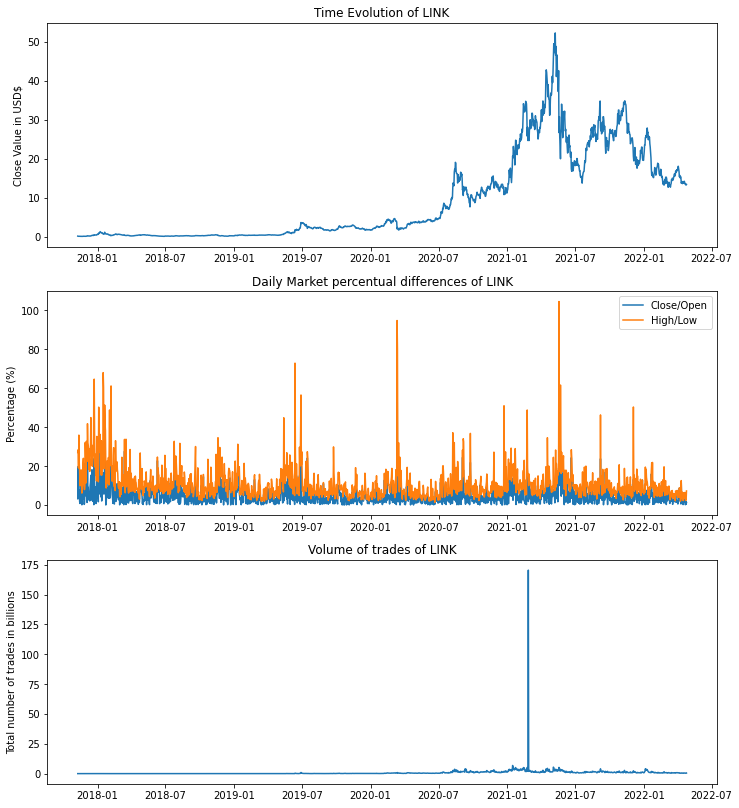

In [13]:
coin_name = plot_coinValue(df)

In [14]:
#FILTER DATASET
df = df.loc[df['Date']>= '2021-11-01']
df

,Date,LINK-USD_ADJCLOSE,LINK-USD_CLOSE,LINK-USD_HIGH,LINK-USD_LOW,LINK-USD_OPEN,LINK-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
1453,2021-11-01,31.565237,31.565237,31.871412,29.208277,30.002562,1.143381e+09,4.950622,9.117743
1454,2021-11-02,32.265533,32.265533,32.496296,31.043903,31.685040,1.026698e+09,1.799115,4.678511
1455,2021-11-03,31.990866,31.990866,32.791611,30.673016,32.265514,1.115162e+09,0.858522,6.907032
1456,2021-11-04,31.020929,31.020929,32.101528,30.289692,31.971289,8.968978e+08,3.063607,5.981693
1457,2021-11-05,32.917904,32.917904,33.696304,30.725060,31.027643,1.516149e+09,5.742348,9.670428
...,...,...,...,...,...,...,...,...,...
1624,2022-04-21,13.588746,13.588746,14.346668,13.472289,14.022598,5.033146e+08,3.192732,6.490205
1625,2022-04-22,13.609354,13.609354,13.852832,13.506432,13.587431,4.649951e+08,0.161088,2.564706
1626,2022-04-23,13.343726,13.343726,13.643617,13.328945,13.609134,3.223842e+08,1.989006,2.360813
1627,2022-04-24,13.287423,13.287423,13.608301,13.275181,13.341961,2.993688e+08,0.410447,2.509347


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(4, df)
windowed_df['Date'] = df.iloc[4:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue,Date
0,31.020929,31.990866,32.265533,31.565237,32.917904,2021-11-05
1,32.917904,31.020929,31.990866,32.265533,32.083439,2021-11-06
2,32.083439,32.917904,31.020929,31.990866,32.349564,2021-11-07
3,32.349564,32.083439,32.917904,31.020929,34.477592,2021-11-08
4,34.477592,32.349564,32.083439,32.917904,33.859272,2021-11-09
...,...,...,...,...,...,...
167,14.024039,14.258342,14.037702,13.764988,13.588746,2022-04-21
168,13.588746,14.024039,14.258342,14.037702,13.609354,2022-04-22
169,13.609354,13.588746,14.024039,14.258342,13.343726,2022-04-23
170,13.343726,13.609354,13.588746,14.024039,13.287423,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((172,), (172, 4, 1), (172,))

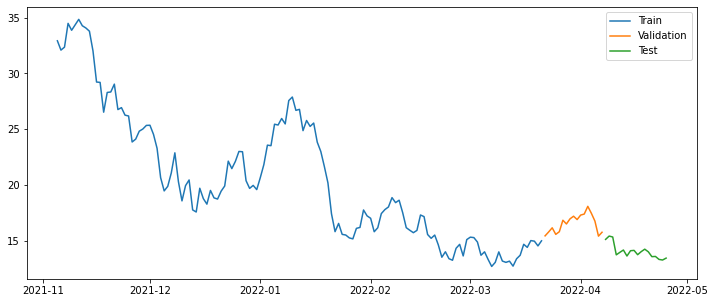

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [ ]:
#!pip install tensorflow

In [19]:
import os
os.environ['PYTHONHASHSEED']= '0'
import numpy as np
np.random.seed(1)
import random as rn
rn.seed(1)
import tensorflow as tf
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

# Function to create LSTM model and compute the MSE value for the given parameters
def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
    
    # create model
    model = Sequential([layers.Input((4, 1)),
                        layers.LSTM(64),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(1)])
    # Compile model
    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
    
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
    
    test_predictions = model.predict(X_test).flatten()
    
    LSTM_mse = mean_squared_error(y_test, test_predictions)
    
    return LSTM_mse

#Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
    
    best_score = float('inf')
    
    for b in batch_size:
        for e in epochs:
            for l in learn_rate:
                print('Batch Size: ' + str(b))
                print('Number of Epochs: ' + str(e))
                print('Value of Learning Rate: ' + str(l))
                try:
                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
                    print('MSE=%.3f' % (mse))
                    if mse < best_score:
                        best_score = mse
                        top_params = [b, e, l]
                except:
                    continue
                    
    print('Best MSE=%.3f' % (best_score))
    print('Optimal Batch Size: ' + str(top_params[0]))
    print('Optimal Number of Epochs: ' + str(top_params[1]))
    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
                        

# define parameters
batch_size = [10, 100, 1000]
epochs = [50, 100]
learn_rate = np.linspace(0.001,0.1, num=10)

warnings.filterwarnings("ignore")
search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

Epoch 1/100
1/1 - 2s - loss: 479.2219 - mean_absolute_error: 21.0737 - val_loss: 260.2453 - val_mean_absolute_error: 16.1127 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 439.1197 - mean_absolute_error: 20.1063 - val_loss: 194.0031 - val_mean_absolute_error: 13.9061 - 24ms/epoch - 24ms/step
Epoch 3/100
1/1 - 0s - loss: 354.8810 - mean_absolute_error: 17.8918 - val_loss: 96.2208 - val_mean_absolute_error: 9.7773 - 28ms/epoch - 28ms/step
Epoch 4/100
1/1 - 0s - loss: 224.1425 - mean_absolute_error: 13.7616 - val_loss: 6.4315 - val_mean_absolute_error: 2.4078 - 24ms/epoch - 24ms/step
Epoch 5/100
1/1 - 0s - loss: 76.4662 - mean_absolute_error: 6.6140 - val_loss: 90.4120 - val_mean_absolute_error: 9.4735 - 21ms/epoch - 21ms/step
Epoch 6/100
1/1 - 0s - loss: 65.7473 - mean_absolute_error: 7.0168 - val_loss: 195.7812 - val_mean_absolute_error: 13.9687 - 26ms/epoch - 26ms/step
Epoch 7/100
1/1 - 0s - loss: 133.3452 - mean_absolute_error: 10.3715 - val_loss: 118.4256 - val_mean_absolute_error

Epoch 57/100
1/1 - 0s - loss: 11.5732 - mean_absolute_error: 2.6505 - val_loss: 0.8363 - val_mean_absolute_error: 0.6674 - 23ms/epoch - 23ms/step
Epoch 58/100
1/1 - 0s - loss: 9.6091 - mean_absolute_error: 2.4018 - val_loss: 0.8383 - val_mean_absolute_error: 0.6596 - 22ms/epoch - 22ms/step
Epoch 59/100
1/1 - 0s - loss: 8.1571 - mean_absolute_error: 2.2714 - val_loss: 0.8879 - val_mean_absolute_error: 0.8056 - 22ms/epoch - 22ms/step
Epoch 60/100
1/1 - 0s - loss: 7.0404 - mean_absolute_error: 2.0588 - val_loss: 1.4065 - val_mean_absolute_error: 1.0705 - 21ms/epoch - 21ms/step
Epoch 61/100
1/1 - 0s - loss: 6.8521 - mean_absolute_error: 2.0294 - val_loss: 1.2880 - val_mean_absolute_error: 1.0214 - 23ms/epoch - 23ms/step
Epoch 62/100
1/1 - 0s - loss: 6.4584 - mean_absolute_error: 2.0018 - val_loss: 0.6104 - val_mean_absolute_error: 0.6126 - 21ms/epoch - 21ms/step
Epoch 63/100
1/1 - 0s - loss: 5.8380 - mean_absolute_error: 2.0011 - val_loss: 0.6909 - val_mean_absolute_error: 0.6937 - 21ms/ep

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [ ]:
#BEST SOLUTION OF THE MODEL

# MSE=20.904
# Batch Size: 10
# Number of Epochs: 100
# Value of Learning Rate: 0.001

model = Sequential([layers.Input((4, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=10, verbose=2)

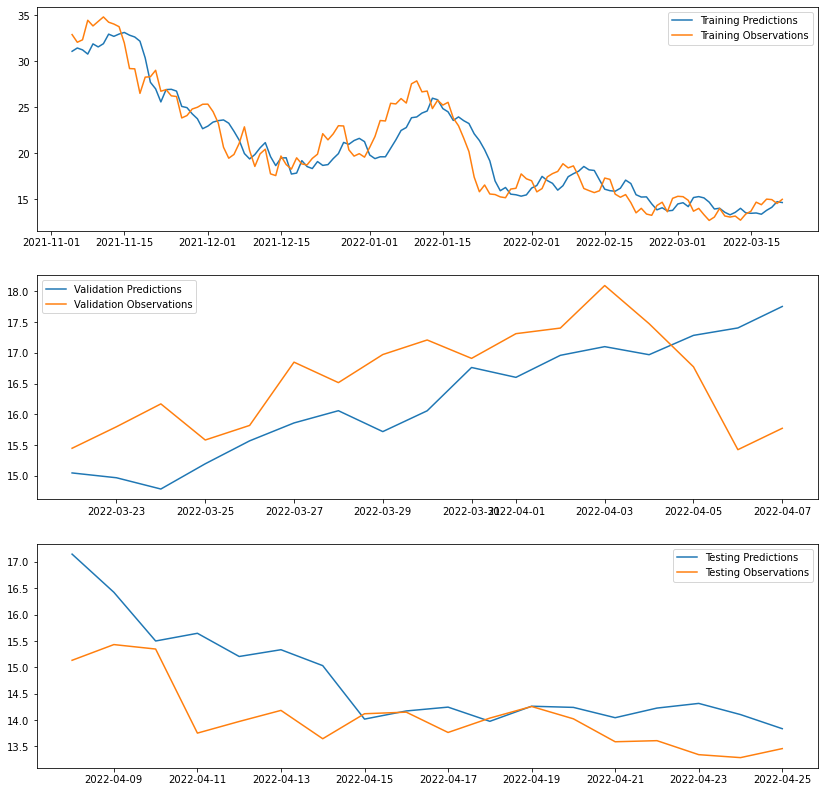

In [21]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [22]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

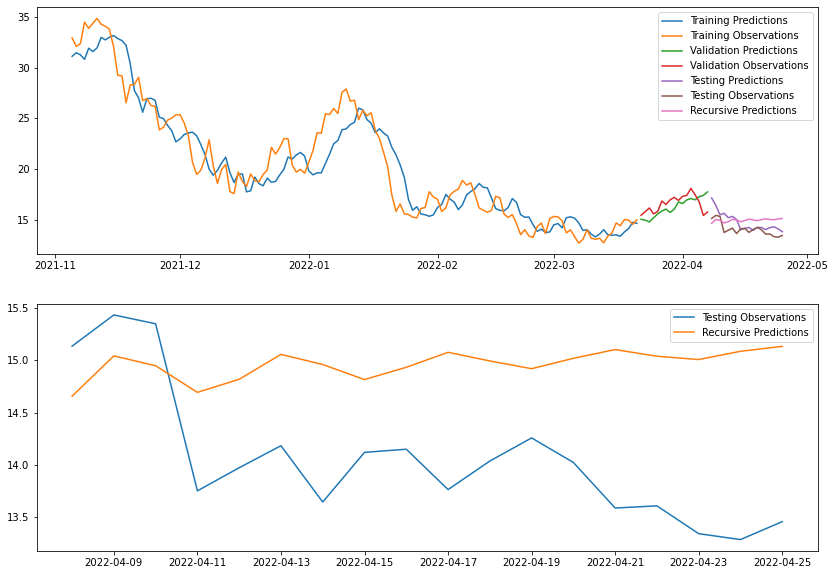

In [23]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')